# Lab03 决策树

实现 `ID3` 算法与 `CART` 算法的重点：信息增益的计算与基尼系数的计算

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 数据处理

In [3]:
df = pd.read_csv('Data.csv')
data = df.drop(['ID'], axis=1)


## 实验任务

实现要求的两个函数并测试（只需要测试第一个选择的特征是否正确，并输出其信息增益/基尼系数即可）

In [4]:
def calc_ent(data):
    pk = pd.value_counts(data) / data.shape[0]
    return np.sum(np.log2(pk + 1e-8) * pk * -1)

def ID3fit(dataset):
    max_gain = -1
    max_gain_attr = None
    for i in dataset.columns:
        if i != '贷款申请':
            e = dataset.groupby('贷款申请').apply(lambda x: calc_ent(x[i]))
            p = pd.value_counts(dataset['贷款申请']) / dataset['贷款申请'].shape[0]
            t = np.sum(e * p)
            gain = calc_ent(dataset[i]) - t
            if max_gain < gain:
                max_gain = gain
                max_gain_attr = i
    return {max_gain_attr: max_gain}


## 测试结果

In [5]:
print(ID3fit(data))

{'有自己的房子': 0.4199730882511947}


这里我使用 `sklearn` 中的模型训练后可视化给你看

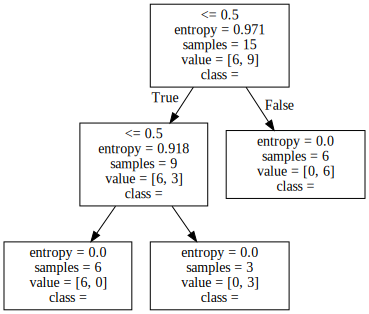

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz

model = DecisionTreeClassifier(criterion='entropy')
X = data.drop(['贷款申请'], axis=1)
Y = data['贷款申请']
model.fit(X, Y)

t = export_graphviz(model, feature_names=['年龄', '有工作', '有自己的房子', '信贷情况'], class_names=['贷款申请通过', '贷款申请未通过'])
g = graphviz.Source(t)
display(g)

`sample` 属性统计出它应用于多少个训练样本实例

`value` 属性告诉你这个节点对于每一个类别的样例有多少个